In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import prepare
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_json('data2.json')

In [3]:
df.shape

(225, 3)

In [4]:
df = prepare.prep_repo_data(df)

In [5]:
df.shape

(174, 6)

In [6]:
df

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible ...,irisshadersiris,java,iris opensource shaders mod compatible optifin...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https:...",returntocorpsemgrep,java,br p aligncenter hrefhttpssemgrepdevimg srchtt...
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/ico...",caffeinemcsodiumfabric,java,img srcsrcmainresourcesassetssodiumiconpng wid...
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Ident...,keycloakkeycloak,java,keycloak keycloak open source identity access ...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resour...",nationalsecurityagencyghidra,java,img srcghidrafeaturesbasesrcmainresourcesimage...
...,...,...,...,...,...,...
193,lgatto/tipsntRicks,R,`tipsntRick` is a collection of R posts. \n- S...,lgattotipsntricks,r,tipsntrick collection r post see ghpages branc...
194,immunogenomics/harmony,R,"Harmony <img src=""man/figures/logo.png"" width=...",immunogenomicsharmony,r,harmony img srcmanfigureslogopng width181px al...
195,haozhu233/kableExtra,R,"# kableExtra <img src=""https://haozhu233.githu...",haozhu233kableextra,r,kableextra img srchttpshaozhu233githubiokablee...
196,r-spatial/mapview,R,---\noutput: github_document\n---\n\n```{r set...,rspatialmapview,r,output githubdocument r setup include false kn...


In [7]:
df = df[['repo_name','language','readme_contents','readme_contents_cleaned']]

In [8]:
df

,repo_name,language,readme_contents,readme_contents_cleaned
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible ...,iris opensource shaders mod compatible optifin...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https:...",br p aligncenter hrefhttpssemgrepdevimg srchtt...
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/ico...",img srcsrcmainresourcesassetssodiumiconpng wid...
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Ident...,keycloak keycloak open source identity access ...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resour...",img srcghidrafeaturesbasesrcmainresourcesimage...
...,...,...,...,...
193,lgatto/tipsntRicks,R,`tipsntRick` is a collection of R posts. \n- S...,tipsntrick collection r post see ghpages branc...
194,immunogenomics/harmony,R,"Harmony <img src=""man/figures/logo.png"" width=...",harmony img srcmanfigureslogopng width181px al...
195,haozhu233/kableExtra,R,"# kableExtra <img src=""https://haozhu233.githu...",kableextra img srchttpshaozhu233githubiokablee...
196,r-spatial/mapview,R,---\noutput: github_document\n---\n\n```{r set...,output githubdocument r setup include false kn...


#  Feauture Engineering 

#### Lets grab the length of each readme

In [9]:
df= df.copy()

In [10]:
df['message_length'] = df.readme_contents_cleaned.apply(len)

In [11]:
df['word_count'] =  df.readme_contents_cleaned.str.split().apply(len)

In [12]:
df

,repo_name,language,readme_contents,readme_contents_cleaned,message_length,word_count
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible ...,iris opensource shaders mod compatible optifin...,6573,842
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https:...",br p aligncenter hrefhttpssemgrepdevimg srchtt...,5958,528
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/ico...",img srcsrcmainresourcesassetssodiumiconpng wid...,4881,493
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Ident...,keycloak keycloak open source identity access ...,1910,170
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resour...",img srcghidrafeaturesbasesrcmainresourcesimage...,3752,413
...,...,...,...,...,...,...
193,lgatto/tipsntRicks,R,`tipsntRick` is a collection of R posts. \n- S...,tipsntrick collection r post see ghpages branc...,254,27
194,immunogenomics/harmony,R,"Harmony <img src=""man/figures/logo.png"" width=...",harmony img srcmanfigureslogopng width181px al...,3128,262
195,haozhu233/kableExtra,R,"# kableExtra <img src=""https://haozhu233.githu...",kableextra img srchttpshaozhu233githubiokablee...,3454,359
196,r-spatial/mapview,R,---\noutput: github_document\n---\n\n```{r set...,output githubdocument r setup include false kn...,3862,297


## Split

In [13]:
train, validate, test = prepare.split_for_model(df, 'language')

train(97, 6),validate(42, 6),test(35, 6)


# Explore

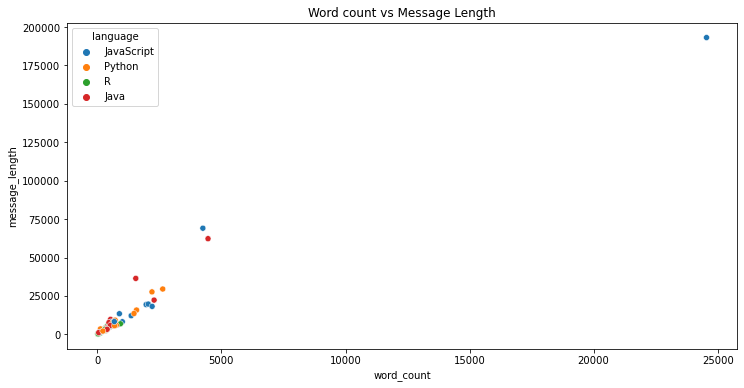

In [14]:
plt.figure(figsize=(12,6))
plt.title("Word count vs Message Length")
sns.scatterplot(data=train, x=train.word_count, y=train.message_length, hue='language')
plt.show()

In [15]:
#avg message length for each language

In [16]:
train.groupby(by='language').message_length.median()

language
Java          4016.5
JavaScript    5096.0
Python        5838.5
R             3328.0
Name: message_length, dtype: float64

In [17]:
#avg word count  for each language

In [18]:
train.groupby(by='language').word_count.median()

language
Java          368.5
JavaScript    465.0
Python        603.0
R             304.0
Name: word_count, dtype: float64

<AxesSubplot:ylabel='language'>

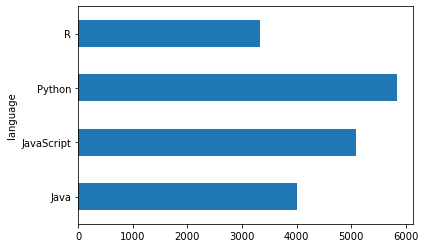

In [19]:
train.groupby(by='language').message_length.median().plot.barh()

<AxesSubplot:ylabel='language'>

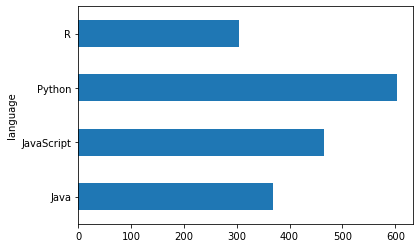

In [20]:
train.groupby(by='language').word_count.median().plot.barh()

In [21]:
#Seems like Javascript readmes tend to be the longer then others. followed python/java then R

In [22]:
#lets look at there words as there own 

In [23]:
train.language.value_counts()

JavaScript    26
Python        26
Java          24
R             21
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='Count'>

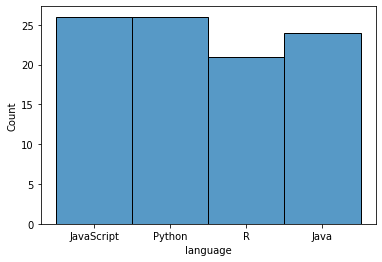

In [24]:
sns.histplot(train, x=train.language)

In [25]:
#lets look at the words that appear in diffrent read mes

In [26]:
java_words =  " ".join(train[train.language == 'Java'].readme_contents_cleaned)
javascript_words =  " ".join(train[train.language == 'JavaScript'].readme_contents_cleaned)
r_words =  " ".join(train[train.language == 'R'].readme_contents_cleaned)
python_words =  " ".join(train[train.language == 'Python'].readme_contents_cleaned)
all_words = ' '.join(train.readme_contents_cleaned)

In [27]:
#Frequency Table
j_freq = pd.Series(java_words.split()).value_counts()
js_freq = pd.Series(javascript_words.split()).value_counts()
r_freq = pd.Series(r_words.split()).value_counts()
p_freq = pd.Series(python_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [28]:
word_table = pd.concat([j_freq, js_freq, r_freq, p_freq, all_freq], axis=1, sort=True).fillna(0).astype(int)

In [29]:
word_table.columns = ['Java','Javascript','R','Python', "All"]

In [30]:
#only java occurances
only_java = []
for i in java_words.split():
    if i not in javascript_words:
        if i not in r_words:
            if i not in python_words:
                only_java.append(i)

In [31]:
#only javascript occurances 
only_javascript = []
for i in javascript_words.split():
    if i not in java_words:
        if i not in r_words:
            if i not in python_words:
                only_javascript.append(i)

In [32]:
#only R occurances 
only_r = []
for i in r_words.split():
    if i not in java_words:
        if i not in javascript_words:
            if i not in python_words:
                only_r.append(i)

In [99]:
#only Python occurances 
only_python = []
for i in python_words.split():
    if i not in java_words:
        if i not in javascript_words:
            if i not in r_words:
                only_python.append(i)

In [100]:
#common words
common = []
for i in all_words.split():
    if i in java_words:
        if i in javascript_words:
            if i  in r_words:
                if i in python_words:
                    common.append(i)

In [103]:
common = pd.Series(common)

In [113]:
top20common = common.value_counts().head(20).index.to_list()

In [35]:
#make list into one stribg
only_javascript = " ".join(only_javascript)
only_java = " ".join(only_java)

In [36]:
only_r = " ".join(only_r)
only_python = " ".join(only_python)

## Word clouds

### Unique words

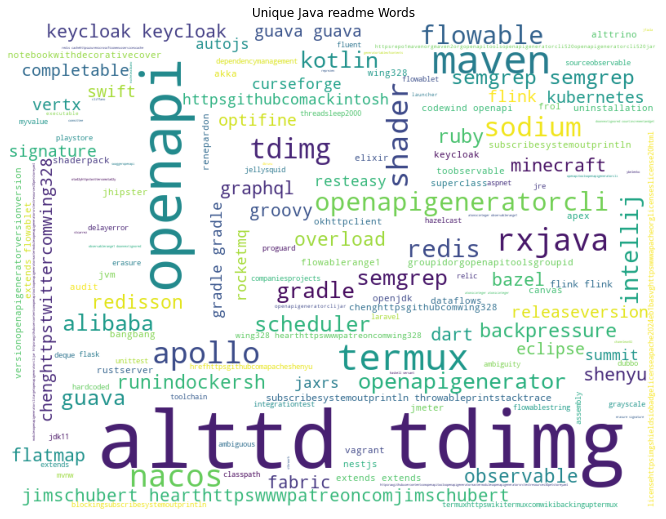

In [37]:
plt.rc('figure', figsize=(16,9))
plt.title('Unique Java readme Words')
img = WordCloud(background_color='white', width=800, height=600).generate(only_java)
plt.imshow(img)
plt.axis('off')
plt.show()

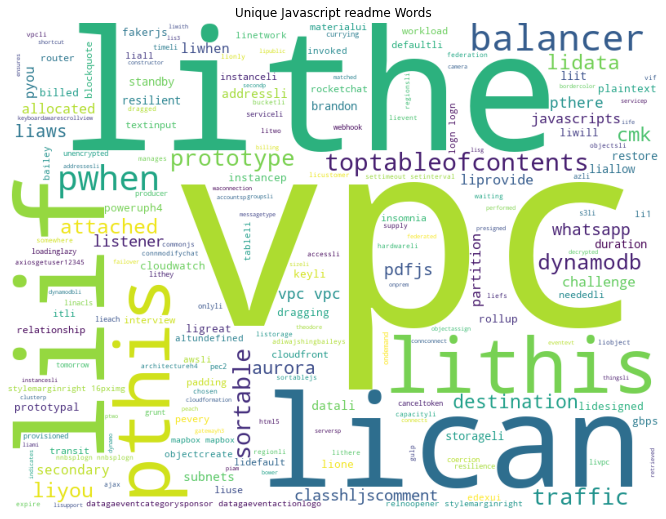

In [38]:
plt.rc('figure', figsize=(16,9))
plt.title('Unique Javascript readme Words')
img = WordCloud(background_color='white', width=800, height=600).generate(only_javascript)
plt.imshow(img)
plt.axis('off')
plt.show()

(-0.5, 799.5, 599.5, -0.5)

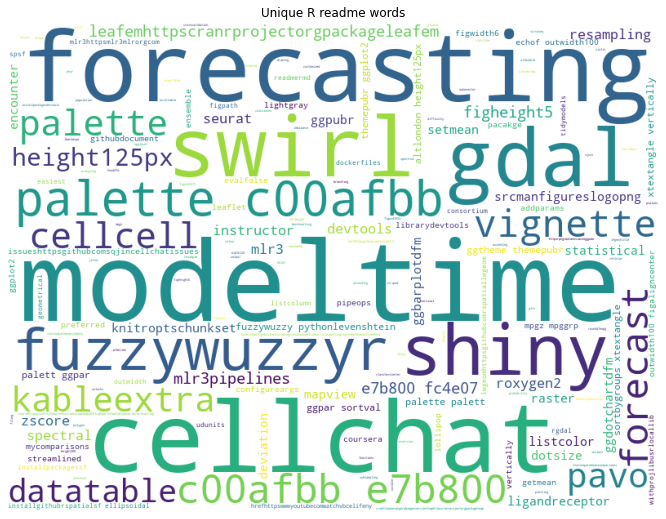

In [39]:
plt.rc('figure', figsize=(16,9))
plt.title("Unique R readme words")
img = WordCloud(background_color='white', width=800, height=600).generate(only_r)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

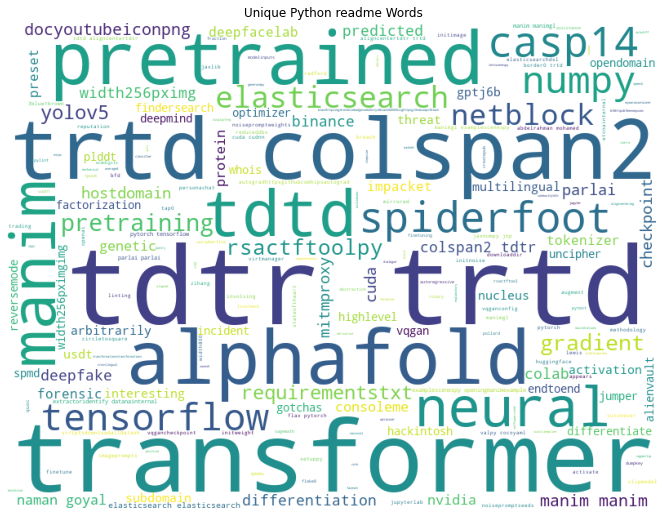

In [40]:
plt.rc('figure', figsize=(16,9))
plt.title('Unique Python readme Words')
img = WordCloud(background_color='white', width=800, height=600).generate(only_python)
plt.imshow(img)
plt.axis('off')

### words that occur

(-0.5, 799.5, 599.5, -0.5)

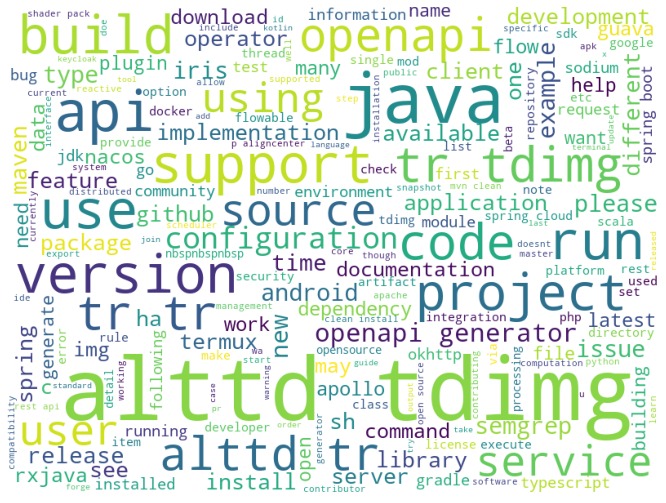

In [41]:
plt.rc('figure', figsize=(16,9))
img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

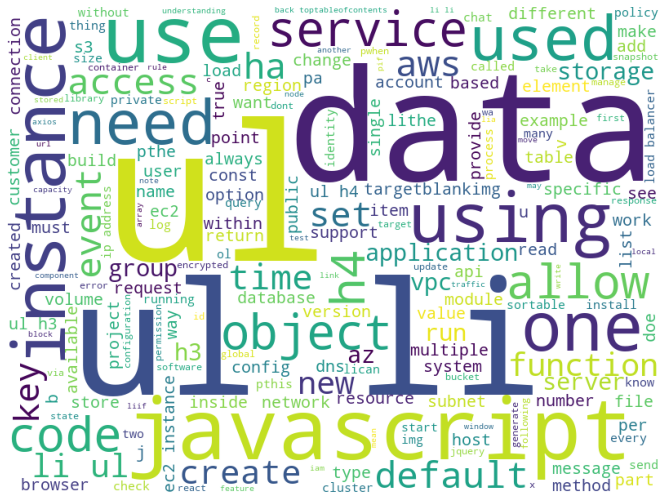

In [42]:
plt.rc('figure', figsize=(16,9))
img = WordCloud(background_color='white', width=800, height=600).generate(javascript_words)
plt.imshow(img)
plt.axis('off')

### Bigrams

In [43]:
top_20_bigrams_java = pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(20)
top_20_bigrams_javascript = pd.Series(nltk.ngrams(javascript_words.split(), 2)).value_counts().head(20)
top_20_bigrams_r = pd.Series(nltk.ngrams(r_words.split(), 2)).value_counts().head(20)
top_20_bigrams_python = pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(20)

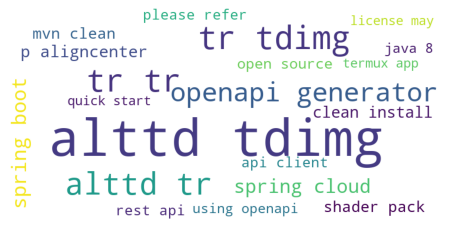

In [44]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_java.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

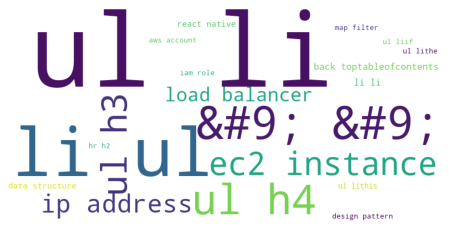

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_javascript.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

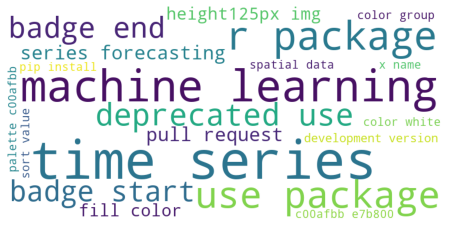

In [46]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_r.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

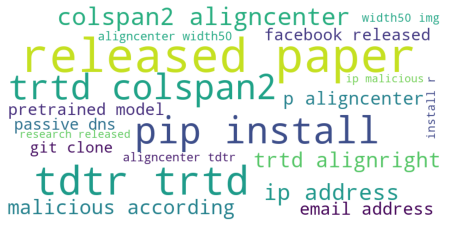

In [47]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_python.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

### trigrams

In [48]:
top_20_trigrams_java = pd.Series(nltk.ngrams(java_words.split(), 3)).value_counts().head(20)
top_20_trigrams_javascript = pd.Series(nltk.ngrams(javascript_words.split(), 3)).value_counts().head(20)
top_20_trigrams_r = pd.Series(nltk.ngrams(r_words.split(), 3)).value_counts().head(20)
top_20_trigrams_python = pd.Series(nltk.ngrams(python_words.split(), 3)).value_counts().head(20)

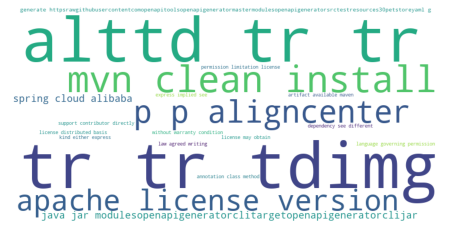

In [49]:
data = {k[0] + ' ' + k[1] + ' '+ k[2]: v for k, v in top_20_trigrams_java.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

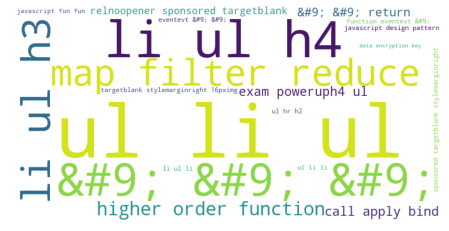

In [50]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_trigrams_javascript.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

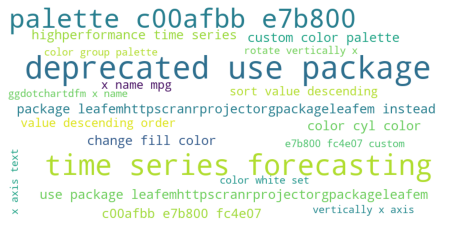

In [51]:
data = {k[0] + ' ' + k[1] + " " + k[2]: v for k, v in top_20_trigrams_r.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

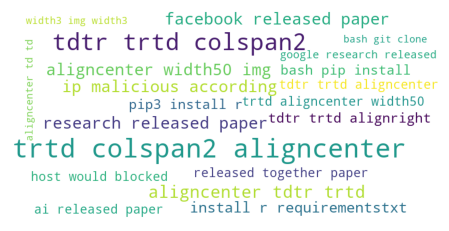

In [52]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_trigrams_python.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Visualize frequencies

<Figure size 1152x648 with 0 Axes>

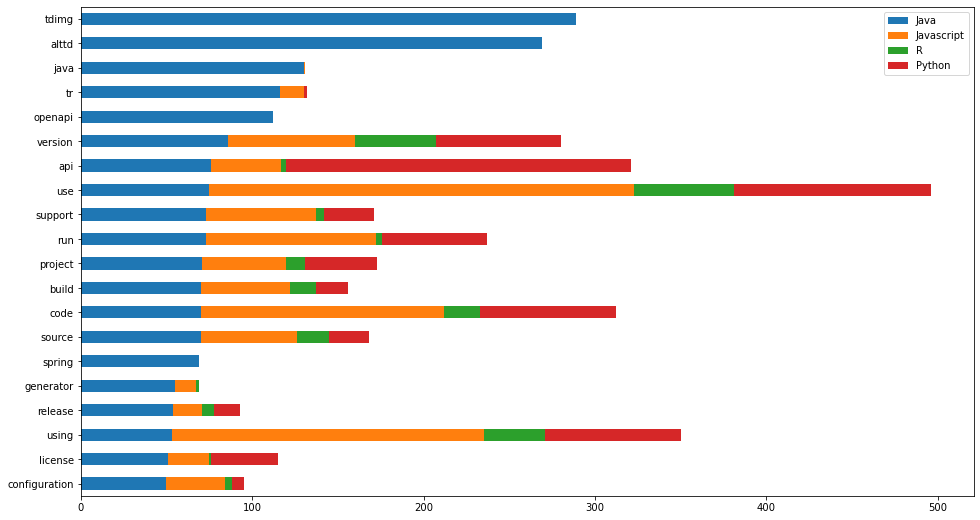

In [53]:
#top 20 Java words and there use in other categories
plt.figure(figsize=(16,9))
plt.rc('figure', figsize=(16,9))
word_table.sort_values(by='Java', ascending=False).head(20).drop(columns='All').sort_values(by='Java').plot.barh(stacked=True)
plt.show()

<Figure size 1152x648 with 0 Axes>

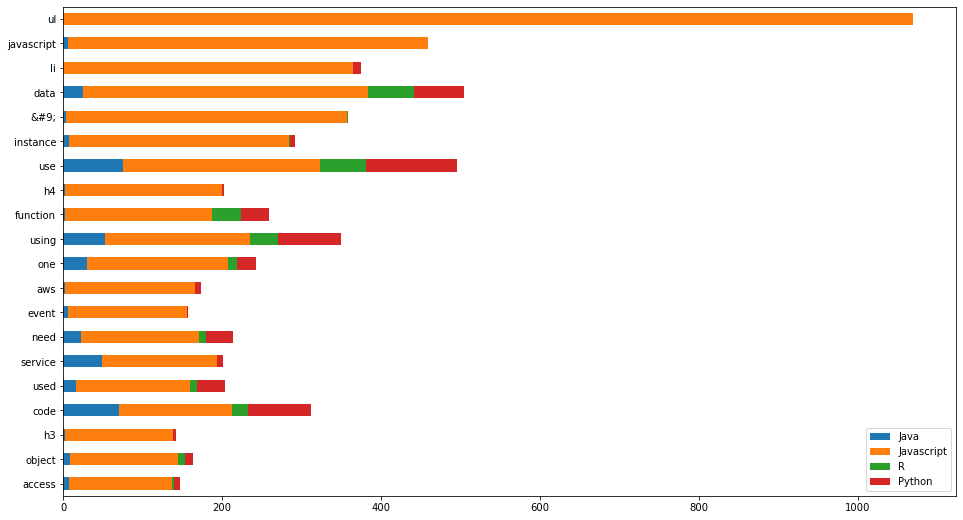

In [54]:
#top 20 Javascript words and there use in other categories
plt.figure(figsize=(16,9))
plt.rc('figure', figsize=(16,9))
word_table.sort_values(by='Javascript', ascending=False).head(20).drop(columns='All').sort_values(by='Javascript').plot.barh(stacked=True)
plt.show()

<Figure size 1152x648 with 0 Axes>

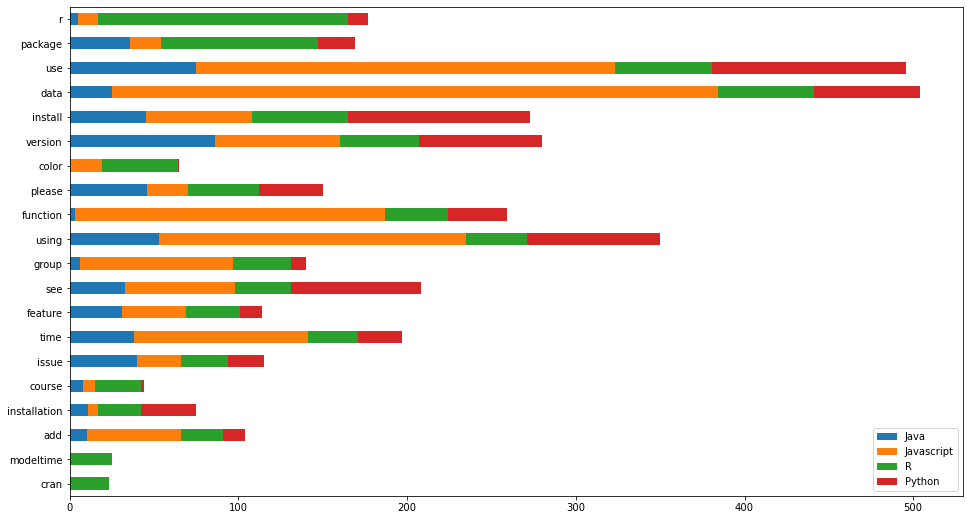

In [55]:
#top 20 Java words and there use in other categories
plt.figure(figsize=(16,9))
plt.rc('figure', figsize=(16,9))
word_table.sort_values(by='R', ascending=False).head(20).drop(columns='All').sort_values(by='R').plot.barh(stacked=True)
plt.show()

<Figure size 1152x648 with 0 Axes>

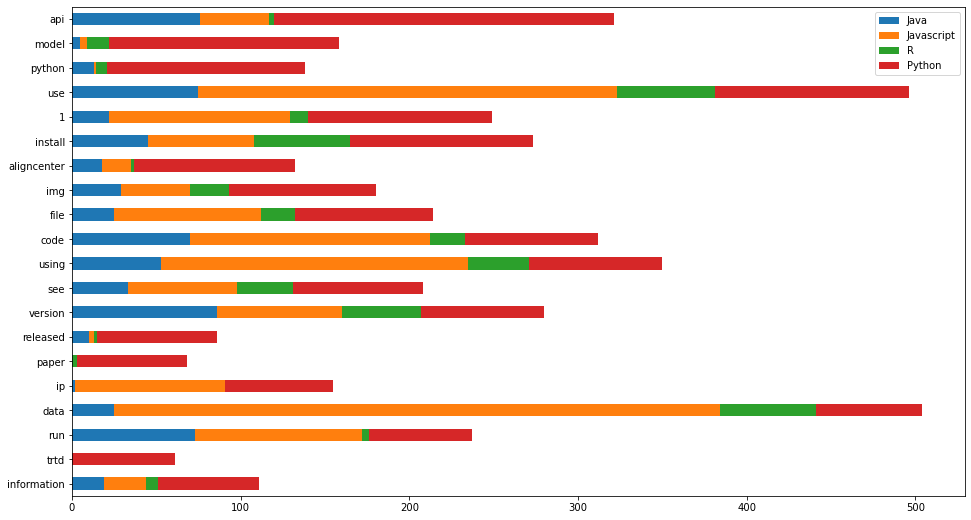

In [56]:
#top 20 Python words and there use in other categories
plt.figure(figsize=(16,9))
plt.rc('figure', figsize=(16,9))
word_table.sort_values(by='Python', ascending=False).head(20).drop(columns='All').sort_values(by='Python').plot.barh(stacked=True)
plt.show()

<AxesSubplot:>

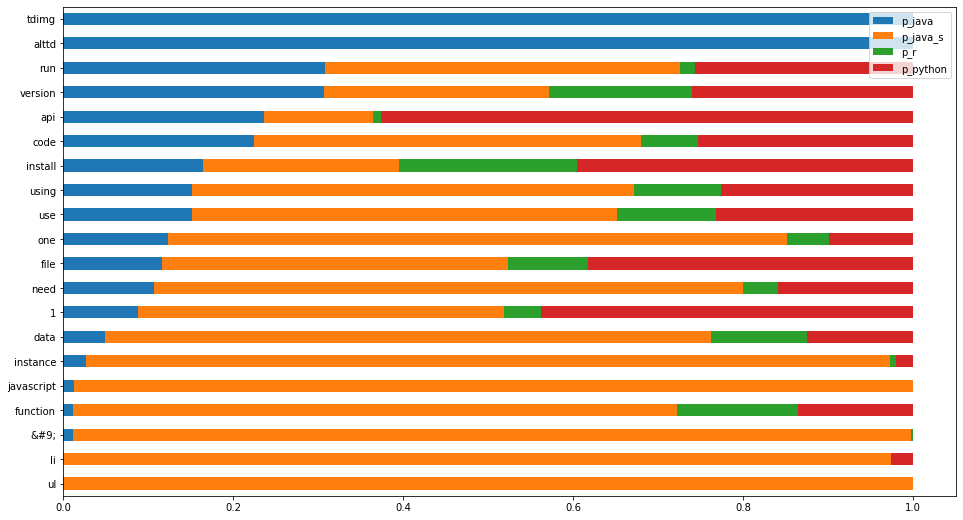

In [57]:
(word_table
 .assign(p_java = word_table.Java / word_table['All'],
         p_java_s =word_table.Javascript/ word_table['All'],
         p_r = word_table.R / word_table['All'],
         p_python =word_table.Python / word_table['All'])
 .sort_values(by='All')
 [['p_java', 'p_java_s','p_r','p_python']]
 .tail(20)
 .sort_values('p_java')
 .plot.barh(stacked=True))

<AxesSubplot:>

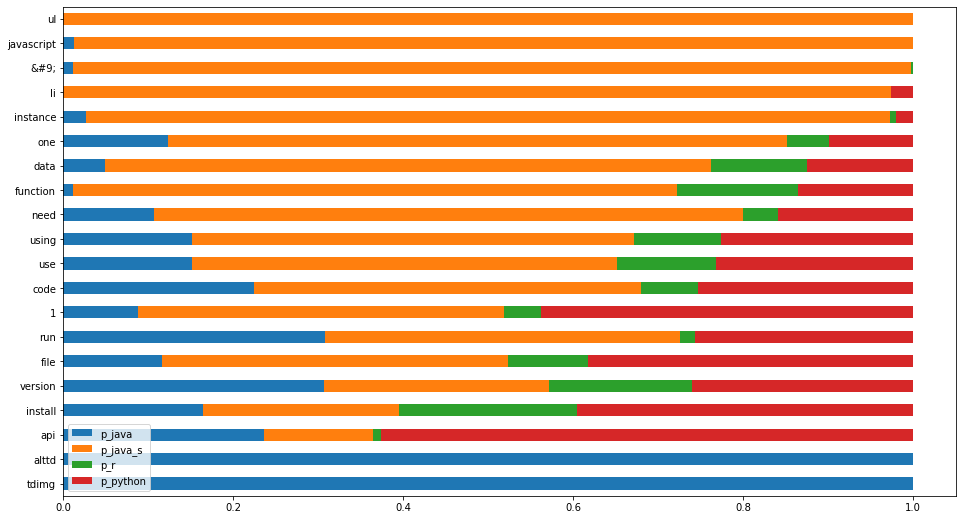

In [58]:
(word_table
 .assign(p_java = word_table.Java / word_table['All'],
         p_java_s =word_table.Javascript/ word_table['All'],
         p_r = word_table.R / word_table['All'],
         p_python =word_table.Python / word_table['All'])
 .sort_values(by='All')
 [['p_java', 'p_java_s','p_r','p_python']]
 .tail(20)
 .sort_values('p_java_s')
 .plot.barh(stacked=True))

<AxesSubplot:>

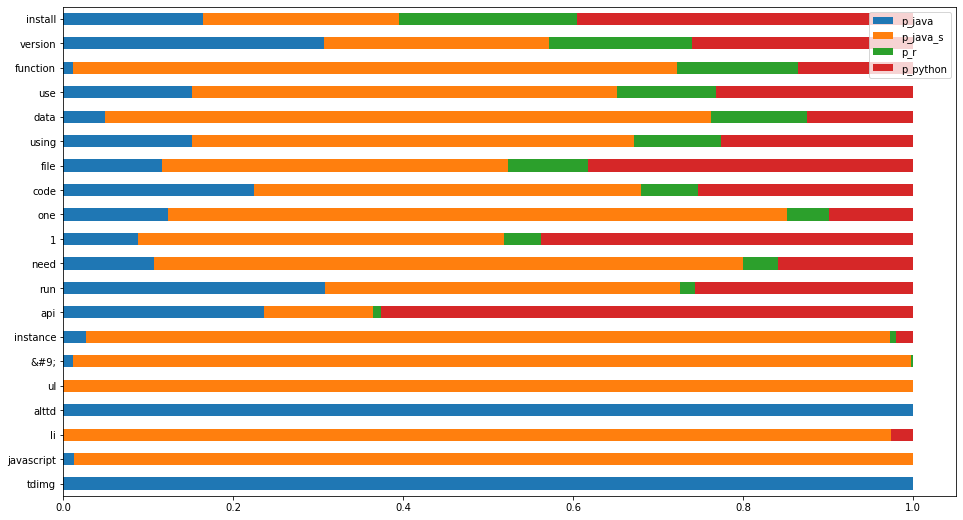

In [59]:
(word_table
 .assign(p_java = word_table.Java / word_table['All'],
         p_java_s =word_table.Javascript/ word_table['All'],
         p_r = word_table.R / word_table['All'],
         p_python =word_table.Python / word_table['All'])
 .sort_values(by='All')
 [['p_java', 'p_java_s','p_r','p_python']]
 .tail(20)
 .sort_values('p_r')
 .plot.barh(stacked=True))

<AxesSubplot:>

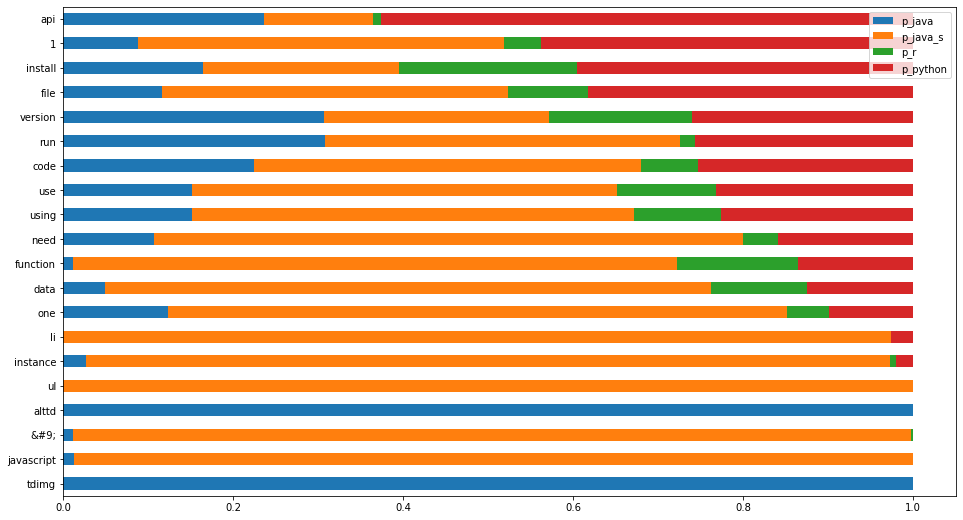

In [60]:
(word_table
 .assign(p_java = word_table.Java / word_table['All'],
         p_java_s =word_table.Javascript/ word_table['All'],
         p_r = word_table.R / word_table['All'],
         p_python =word_table.Python / word_table['All'])
 .sort_values(by='All')
 [['p_java', 'p_java_s','p_r','p_python']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

# Modeling 

In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,recall_score, precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')



def train_validate_results(model, X_train, y_train, X_validate, y_validate, details=False):

    '''
    this function prints the accuracy, recall and precision of the model passed in
    if details = True, it will display the classification report and the confusion matrices for train and validate dataframes
    
    '''
    model.fit(X_train, y_train)
    t_pred = model.predict(X_train)
    v_pred = model.predict(X_validate)
    print('Train model Accuracy: {:.5f} %  | Validate model accuracy: {:.5f} % '.format(accuracy_score(y_train, t_pred) * 100, accuracy_score(y_validate, v_pred) * 100))
    print('Train model Recall: {:.5f} %    | Validate model Recall: {:.5f} %'.format(recall_score(y_train, t_pred, average='micro') * 100, recall_score(y_validate, v_pred, average='micro') * 100))
    print('Train model Precision: {:.5f} % | Validate model Precision: {:.5f} %'.format(precision_score(y_train, t_pred, average='macro') * 100, precision_score(y_validate, v_pred, average='macro') * 100))
    print('------------------------------------------------------------------------')
    if details == True:
        Col_labels = ['Java', 'Javascript','R','Python']
        Row_labels = ['Java', 'Javascript','R','Python']
        print('---------- More Details ------------')
        print('-----Train Classification report----')
        print(pd.DataFrame(classification_report(y_train, t_pred, output_dict =True)))
        print('------Validate Classification report-----')
        print(pd.DataFrame(classification_report(y_validate, v_pred, output_dict =True)))
        print('-----Train Confusion Matrix------')
        print(pd.DataFrame(confusion_matrix(t_pred, y_train), index=Row_labels, columns=Col_labels))
        print('-----Validation Confusion Matrix------')
        print(pd.DataFrame(confusion_matrix(v_pred, y_validate), index=Row_labels, columns=Col_labels))

In [62]:
def test_results(model, X_test, y_test, X_train, y_train, details=False):
    '''
    this function prints the accuracy, recall and precision of the model passed in
    if details = True, it will display the classification report and the confusion matrices for train and validate dataframes
    
    '''
    model.fit(X_train, y_train)
    t_pred = model.predict(X_test)
    print('Test model Accuracy: {:.5f} %'.format(accuracy_score(y_test, t_pred) * 100))
    print('Test model Recall: {:.5f} % '.format(recall_score(y_test, t_pred,average='micro') * 100))
    print('Test model Precision: {:.5f} %'.format(precision_score(y_test, t_pred, average='micro') * 100)) 
    if details == True:
        Col_labels = ['Java', 'Javascript','R','Python']
        Row_labels = ['Java', 'Javascript','R','Python']
        print('---------- More Details ------------')
        print('-----Test Classification report----')
        print(pd.DataFrame(classification_report(y_test, t_pred, output_dict =True)))
        print('-----Test Confusion Matrix------')
        print(pd.DataFrame(confusion_matrix(t_pred, y_test), index=Row_labels, columns=Col_labels))
        

### Baseline

In [63]:
#Javascript and Python is our most occuring languages, we'll use that as our baseline.

In [64]:
#get our Baseline information
print('Baseline to beat')
print('{:.5f}%'.format(round(len(df[df.language == 'JavaScript'])/df.language.value_counts().sum(),5) *100))

Baseline to beat
27.01100%


### NGrams = 1

In [114]:
tfidf = TfidfVectorizer(stop_words=top20common)

X = tfidf.fit_transform(df.readme_contents_cleaned)
y = df.language

In [115]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=254)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, stratify= y_train_validate, test_size=.3, random_state=254)

In [116]:
X_train.shape[0], X_validate.shape[0], X_test.shape[0]

(97, 42, 35)

### Logistic Regression

In [117]:
lm = LogisticRegression(C=1).fit(X_train, y_train)
train_validate_results(lm, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 73.80952 % 
Train model Recall: 100.00000 %    | Validate model Recall: 73.80952 %
Train model Precision: 100.00000 % | Validate model Precision: 79.96032 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    24.0        26.0    26.0  21.0       1.0       97.0          97.0
------Validate Classification report-----
                Java  JavaScript     Python         R  accuracy  macro avg  \
precision   0.888889    0.642857   0.666667  1.000000  0.738095   0.799603   
recall      0.800000    0.818182   0.833333  0.4444

### Naive Bayes

In [118]:
nb = MultinomialNB(alpha=0.005)
train_validate_results(nb, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 76.19048 % 
Train model Recall: 100.00000 %    | Validate model Recall: 76.19048 %
Train model Precision: 100.00000 % | Validate model Precision: 77.46753 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    24.0        26.0    26.0  21.0       1.0       97.0          97.0
------Validate Classification report-----
                Java  JavaScript     Python         R  accuracy  macro avg  \
precision   0.714286    0.800000   0.727273  0.857143  0.761905   0.774675   
recall      1.000000    0.727273   0.666667  0.6666

### Decision Tree

In [119]:
dt = DecisionTreeClassifier(max_depth=5)
train_validate_results(dt, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 86.59794 %  | Validate model accuracy: 57.14286 % 
Train model Recall: 86.59794 %    | Validate model Recall: 57.14286 %
Train model Precision: 90.96890 % | Validate model Precision: 71.25000 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                Java  JavaScript     Python          R  accuracy  macro avg  \
precision   0.954545    0.684211   1.000000   1.000000  0.865979   0.909689   
recall      0.875000    1.000000   0.884615   0.666667  0.865979   0.856571   
f1-score    0.913043    0.812500   0.938776   0.800000  0.865979   0.866080   
support    24.000000   26.000000  26.000000  21.000000  0.865979  97.000000   

           weighted avg  
precision      0.904109  
recall         0.865979  
f1-score       0.868518  
support       97.000000  
------Validate Classification report-----
                Java  JavaScript     Python         R  accuracy  macr

### Random Forest

In [120]:
rf  = RandomForestClassifier(random_state=345, min_samples_leaf=10)
train_validate_results(rf, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 77.31959 %  | Validate model accuracy: 57.14286 % 
Train model Recall: 77.31959 %    | Validate model Recall: 57.14286 %
Train model Precision: 83.12500 % | Validate model Precision: 65.62500 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                Java  JavaScript     Python          R  accuracy  macro avg  \
precision   0.900000    0.800000   0.625000   1.000000  0.773196   0.831250   
recall      0.750000    0.769231   0.961538   0.571429  0.773196   0.763049   
f1-score    0.818182    0.784314   0.757576   0.727273  0.773196   0.771836   
support    24.000000   26.000000  26.000000  21.000000  0.773196  97.000000   

           weighted avg  
precision      0.821134  
recall         0.773196  
f1-score       0.773177  
support       97.000000  
------Validate Classification report-----
                Java  JavaScript     Python         R  accuracy  macr

### LinearSVC

In [121]:
svc = LinearSVC()
train_validate_results(svc, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 80.95238 % 
Train model Recall: 100.00000 %    | Validate model Recall: 80.95238 %
Train model Precision: 100.00000 % | Validate model Precision: 84.03846 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    24.0        26.0    26.0  21.0       1.0       97.0          97.0
------Validate Classification report-----
           Java  JavaScript     Python         R  accuracy  macro avg  \
precision   0.9    0.692308   0.769231  1.000000  0.809524   0.840385   
recall      0.9    0.818182   0.833333  0.666667  0.809524   

### Bigrams  

In [73]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

X = tfidf.fit_transform(df.readme_contents_cleaned)
y = df.language

In [74]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=254)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, stratify= y_train_validate, test_size=.2, random_state=254)

### Logistic Regression Bigrams

In [75]:
lm = LogisticRegression(C=1).fit(X_train, y_train)
train_validate_results(lm, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 42.85714 % 
Train model Recall: 100.00000 %    | Validate model Recall: 42.85714 %
Train model Precision: 100.00000 % | Validate model Precision: 48.51974 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    27.0        30.0    30.0  24.0       1.0      111.0         111.0
------Validate Classification report-----
               Java  JavaScript  Python    R  accuracy  macro avg  \
precision  1.000000    0.315789   0.625  0.0  0.428571   0.485197   
recall     0.142857    0.857143   0.625  0.0  0.428571   0.406250   


### Naive Bayes Bigrams

In [76]:
nb = MultinomialNB(alpha=0.005)
train_validate_results(nb, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 39.28571 % 
Train model Recall: 100.00000 %    | Validate model Recall: 39.28571 %
Train model Precision: 100.00000 % | Validate model Precision: 27.97619 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    27.0        30.0    30.0  24.0       1.0      111.0         111.0
------Validate Classification report-----
               Java  JavaScript  Python         R  accuracy  macro avg  \
precision  0.833333         0.0     0.0  0.285714  0.392857   0.279762   
recall     0.714286         0.0     0.0  1.000000  0.392857

### Decision Tree Bigrams

In [77]:
dt = DecisionTreeClassifier(max_depth = 5)
train_validate_results(dt, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 64.86486 %  | Validate model accuracy: 53.57143 % 
Train model Recall: 64.86486 %    | Validate model Recall: 53.57143 %
Train model Precision: 85.22727 % | Validate model Precision: 52.57937 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                Java  JavaScript     Python          R  accuracy   macro avg  \
precision   0.409091    1.000000   1.000000   1.000000  0.648649    0.852273   
recall      1.000000    0.366667   0.566667   0.708333  0.648649    0.660417   
f1-score    0.580645    0.536585   0.723404   0.829268  0.648649    0.667476   
support    27.000000   30.000000  30.000000  24.000000  0.648649  111.000000   

           weighted avg  
precision      0.856265  
recall         0.648649  
f1-score       0.661077  
support      111.000000  
------Validate Classification report-----
               Java  JavaScript    Python         R  accuracy  m

### RandomForest Bigrams

In [78]:
rf  = RandomForestClassifier(random_state=345, max_depth = 3)
train_validate_results(rf, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 81.08108 %  | Validate model accuracy: 35.71429 % 
Train model Recall: 81.08108 %    | Validate model Recall: 35.71429 %
Train model Precision: 88.20565 % | Validate model Precision: 42.95455 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                Java  JavaScript     Python          R  accuracy   macro avg  \
precision   1.000000    0.903226   0.625000   1.000000  0.810811    0.882056   
recall      0.629630    0.933333   1.000000   0.625000  0.810811    0.796991   
f1-score    0.772727    0.918033   0.769231   0.769231  0.810811    0.807305   
support    27.000000   30.000000  30.000000  24.000000  0.810811  111.000000   

           weighted avg  
precision      0.872493  
recall         0.810811  
f1-score       0.810298  
support      111.000000  
------Validate Classification report-----
           Java  JavaScript    Python         R  accuracy  macro

### Linear SVC Bigrams

In [79]:
svc = LinearSVC()
train_validate_results(svc, X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 100.00000 %  | Validate model accuracy: 42.85714 % 
Train model Recall: 100.00000 %    | Validate model Recall: 42.85714 %
Train model Precision: 100.00000 % | Validate model Precision: 64.58333 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
           Java  JavaScript  Python     R  accuracy  macro avg  weighted avg
precision   1.0         1.0     1.0   1.0       1.0        1.0           1.0
recall      1.0         1.0     1.0   1.0       1.0        1.0           1.0
f1-score    1.0         1.0     1.0   1.0       1.0        1.0           1.0
support    27.0        30.0    30.0  24.0       1.0      111.0         111.0
------Validate Classification report-----
               Java  JavaScript  Python         R  accuracy  macro avg  \
precision  0.500000    0.333333   0.750  1.000000  0.428571   0.645833   
recall     0.142857    1.000000   0.375  0.166667  0.428571

### Takeaways
-  All models seem to do 100% or close too 100% in train, but drop off signigicantly on unseen data, since all models are equally overfit , we'll use Linear SVC bigrams on test

In [80]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.readme_contents_cleaned)
y = df.language

In [81]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=254)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, stratify= y_train_validate, test_size=.3, random_state=254)

In [82]:
test_results(dt, X_train, y_train, X_test, y_test, details=True )

Test model Accuracy: 45.36082 %
Test model Recall: 45.36082 % 
Test model Precision: 45.36082 %
---------- More Details ------------
-----Test Classification report----
                Java  JavaScript     Python          R  accuracy  macro avg  \
precision   0.600000    0.363636   0.653846   0.294118  0.453608   0.477900   
recall      0.375000    0.307692   0.653846   0.476190  0.453608   0.453182   
f1-score    0.461538    0.333333   0.653846   0.363636  0.453608   0.453089   
support    24.000000   26.000000  26.000000  21.000000  0.453608  97.000000   

           weighted avg  
precision      0.484856  
recall         0.453608  
f1-score       0.457525  
support       97.000000  
-----Test Confusion Matrix------
            Java  Javascript   R  Python
Java           9           2   2       2
Javascript     6           8   1       7
R              5           2  17       2
Python         4          14   6      10


# Conclusion
- Linear SVC using bigrams has an accuracy score of 100% on train, 80% on validate, and 56% on test. making the model overfit.
- Right now, model performance is too reliant on luck, as it depends on the words seen in train, in order to predict our smaller splits, becuase the smaller splits might not pertain true key words needed to be accurate , more data should be used for a less luck reliant models.

- In the current state of the dataset, it seems the models have a hard time distiguishing Javascript files to Java files and Javscript files to R files. 

- Maybe languages are too similar or more data is needed to give the models more words to look at, as its not able to distiguish based on what is seen now.

- With more time
    * Explore more readmes, add them to the dataset to see if that helps performance for models
    * Tweak hyperparameters to enhance model performance
    * explore number of n grams to see if longer sentances help distiguish languages better.